How do people move if they aren't commuting? This notebook is trying to find relevant behaviour patterns that can be used for "adventurers".

This uses 3 OD matrices. 2 from BBC pandemic and 1 from ONS commuters. These have been recast into a common geography, and then we've assumed that the population size in each patch hasn't changed drastically between datasets (which are 7 years apart, great assumption).


In [2]:
from scipy.sparse import csr_matrix
%load_ext autoreload
%autoreload 2

In [17]:
from grab_data import get_matrix, get_population_sizes, get_population_ordering
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy

In [4]:
sizes = get_population_sizes('CENSUS_LAD11')
od_matrix = get_matrix('CENSUS_LAD11')

# Eigenvalues of commuter matrix
Quick check so I can see how mixing affects metapopulation models.


In [29]:
A = deepcopy(od_matrix)
commuters = A.sum(axis=1)
non_commuters = sizes - commuters
np.fill_diagonal(A, non_commuters)
A = np.dot(A.T, np.diag(1/sizes))
A

array([[6.51866823e-01, 7.15255903e-03, 4.12792117e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.72882166e-02, 6.66661850e-01, 7.81863779e-02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [5.80258182e-03, 3.69259891e-02, 6.52233738e-01, ...,
        0.00000000e+00, 0.00000000e+00, 3.40124486e-05],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        6.18399023e-01, 9.85140176e-04, 5.15288596e-03],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        2.74468903e-04, 6.67955120e-01, 3.72436312e-03],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        5.96969863e-04, 1.69955481e-03, 6.34451209e-01]])

In [31]:
from scipy.linalg import eigh
w= eigh(A, eigvals_only=True)
w

array([0.1549737 , 0.4367852 , 0.46703973, 0.47751254, 0.48258803,
       0.4826743 , 0.48655118, 0.48931309, 0.49026052, 0.49621273,
       0.49654683, 0.50042062, 0.50248351, 0.50423617, 0.50451618,
       0.50678402, 0.50715763, 0.50782934, 0.51178762, 0.51285901,
       0.51308412, 0.51400408, 0.51587896, 0.51808084, 0.51817182,
       0.51996244, 0.52049431, 0.52288746, 0.52297566, 0.525566  ,
       0.52587789, 0.52818727, 0.52850415, 0.528924  , 0.52949146,
       0.52977713, 0.53000477, 0.5314587 , 0.53162134, 0.53463392,
       0.53507479, 0.53528615, 0.53540542, 0.53541836, 0.53653406,
       0.53757679, 0.53893222, 0.54034552, 0.5417365 , 0.54214452,
       0.54278095, 0.54334623, 0.54449681, 0.54530955, 0.54581791,
       0.54612446, 0.5467539 , 0.54749001, 0.54770885, 0.54937467,
       0.55005168, 0.55085976, 0.55125163, 0.55136139, 0.55156969,
       0.5517072 , 0.55174091, 0.55246198, 0.55276607, 0.55375924,
       0.55526942, 0.55544719, 0.5559822 , 0.55665489, 0.55745

# Can we get everywhere with commuters?
Probably, check the number of connected components

In [14]:
from scipy.sparse.csgraph import connected_components
from scipy.sparse import csr_array
adjacency_matrix = csr_array(np.array(od_matrix != 0).astype(int))
connected_components(csgraph=adjacency_matrix, directed=True, return_labels=False)


1

# Population sizes and effects on flux

In [6]:
flux_terms = od_matrix - od_matrix.T
flux = flux_terms.sum(axis=1)

In [48]:
ratio = sizes/flux

In [53]:
np.exp(-1/(1+ratio.min()))

1.000080240262228

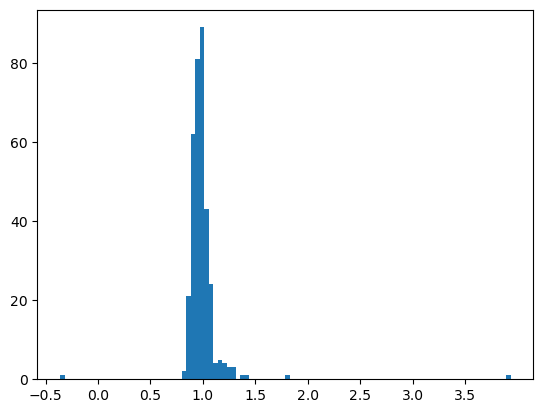

In [42]:
plt.hist(diff, bins=100)
plt.xticks(np.arange(-0.5, 4, 0.5))
plt.show()